In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mercedes-benz-greener-manufacturing/sample_submission.csv
/kaggle/input/mercedes-benz-greener-manufacturing/test.csv
/kaggle/input/mercedes-benz-greener-manufacturing/train.csv


In [2]:
train=pd.read_csv('/kaggle/input/mercedes-benz-greener-manufacturing/train.csv')

In [3]:
test=pd.read_csv('/kaggle/input/mercedes-benz-greener-manufacturing/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.select_dtypes(['object'])

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [7]:
train['X2'].unique()

array(['at', 'av', 'n', 'e', 'as', 'aq', 'r', 'ai', 'ak', 'm', 'a', 'k',
       'ae', 's', 'f', 'd', 'ag', 'ay', 'ac', 'ap', 'g', 'i', 'aw', 'y',
       'b', 'ao', 'al', 'h', 'x', 'au', 't', 'an', 'z', 'ah', 'p', 'am',
       'j', 'q', 'af', 'l', 'aa', 'c', 'o', 'ar'], dtype=object)

In [8]:
train['X2'].value_counts()

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
ag      19
z       19
d       18
ac      13
g       12
ap      11
y       11
x       10
aw       8
at       6
h        6
q        5
al       5
an       5
p        4
ah       4
av       4
au       3
o        1
ar       1
am       1
l        1
j        1
c        1
aa       1
af       1
Name: X2, dtype: int64

In [9]:
y_train=train['y'].values

In [10]:
from scipy import stats
import matplotlib.pyplot as plt

((array([-3.5910589 , -3.35299968, -3.22165185, ...,  3.22165185,
          3.35299968,  3.5910589 ]),
  array([ 72.11,  72.5 ,  72.94, ..., 167.45, 169.91, 265.32])),
 (12.285671557419073, 100.66931812782133, 0.9683097111867328))

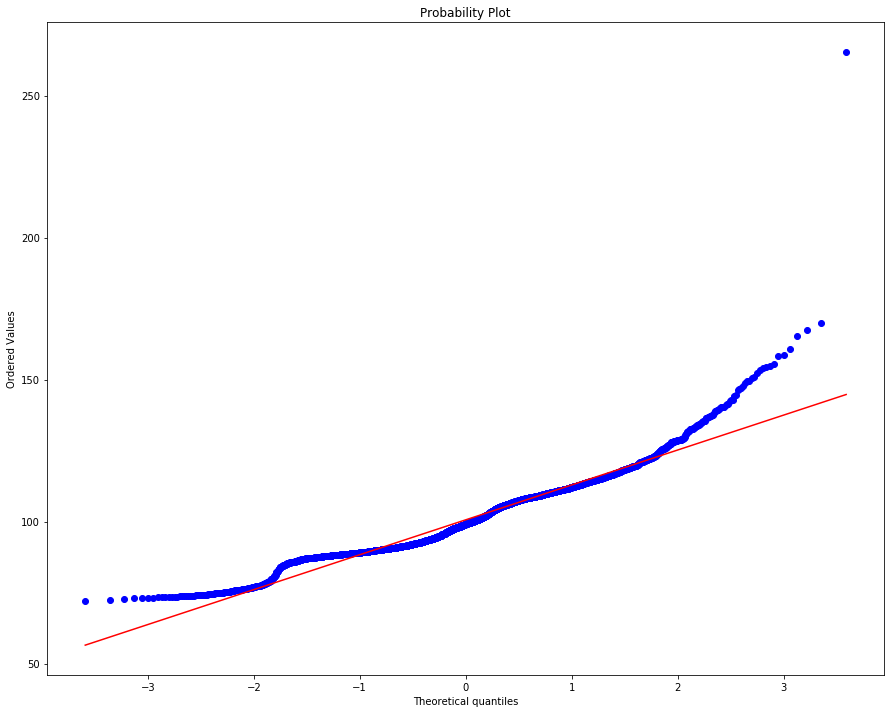

In [11]:
figure=plt.subplots(figsize=(15,12))
stats.probplot(train['y'],plot=plt)

In [12]:
train=train.drop(train[train['y']>200].index)

((array([-3.59099699, -3.35293392, -3.22158377, ...,  3.22158377,
          3.35293392,  3.59099699]),
  array([ 72.11,  72.5 ,  72.94, ..., 165.52, 167.45, 169.91])),
 (12.171548418374835, 100.63019011406843, 0.9790224915410879))

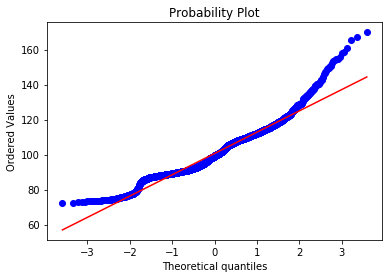

In [13]:
stats.probplot(train['y'],plot=plt)

In [14]:
train['y']=np.log(train['y'])

((array([-3.59099699, -3.35293392, -3.22158377, ...,  3.22158377,
          3.35293392,  3.59099699]),
  array([4.27819273, 4.28358656, 4.28963719, ..., 5.10909203, 5.1206848 ,
         5.13526889])),
 (0.11950650342987866, 4.60407895617826, 0.9891123687412982))

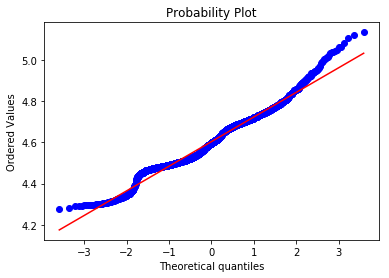

In [15]:
stats.probplot(train['y'],plot=plt)

In [16]:
temp=[]
Z=train.select_dtypes(include=[int,float])
for i in Z.columns:
    if Z[i].var()<0.01:
        temp.append(i)
print(len(temp))
print(temp)        

147
['X11', 'X15', 'X16', 'X17', 'X18', 'X21', 'X24', 'X26', 'X30', 'X33', 'X34', 'X36', 'X39', 'X40', 'X42', 'X53', 'X55', 'X59', 'X60', 'X62', 'X65', 'X67', 'X74', 'X78', 'X83', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X97', 'X99', 'X102', 'X104', 'X105', 'X107', 'X110', 'X112', 'X122', 'X123', 'X124', 'X125', 'X145', 'X153', 'X160', 'X165', 'X167', 'X169', 'X172', 'X173', 'X183', 'X184', 'X190', 'X192', 'X199', 'X200', 'X204', 'X205', 'X207', 'X210', 'X212', 'X213', 'X214', 'X216', 'X217', 'X221', 'X227', 'X230', 'X233', 'X235', 'X236', 'X237', 'X239', 'X240', 'X242', 'X243', 'X245', 'X248', 'X249', 'X252', 'X253', 'X254', 'X257', 'X258', 'X259', 'X260', 'X262', 'X266', 'X267', 'X268', 'X269', 'X270', 'X271', 'X274', 'X277', 'X278', 'X280', 'X281', 'X282', 'X288', 'X289', 'X290', 'X292', 'X293', 'X295', 'X296', 'X297', 'X298', 'X299', 'X307', 'X308', 'X309', 'X310', 'X312', 'X317', 'X318', 'X319', 'X320', 'X323', 'X325', 'X330', 'X332', 'X335', 'X338', 

In [17]:
train.drop(temp,axis=1,inplace=True)

In [18]:
train.shape

(4208, 231)

In [19]:
test.drop(temp,axis=1,inplace=True)

In [20]:
test.shape

(4209, 230)

In [21]:
y_train=train['y'].values

In [22]:
train=train.drop(['ID','y'],axis=1)

In [23]:
test=test.drop('ID',axis=1)

In [24]:
Z.head()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,4.873746,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,6,4.483341,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,7,4.334149,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,9,4.389747,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,4.356965,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
dic={}
for i in Z.columns:
    if i!='y':
        if Z[i].corr(Z.y)>0.25 or Z[i].corr(Z.y)<-0.25:
            dic[i]=Z[i].corr(Z.y)
print("Important Features with there respective correlations are ",'\n','---------------------------------------------------------','\n',dic)

Important Features with there respective correlations are  
 --------------------------------------------------------- 
 {'X28': -0.2907181014751013, 'X29': -0.4380228382892725, 'X54': -0.4277381790894369, 'X76': -0.4277381790894369, 'X108': -0.2519266696463099, 'X118': 0.2911156182646977, 'X119': 0.2911156182646977, 'X127': -0.5207068784198148, 'X136': 0.4277381790894369, 'X162': -0.4136691136376608, 'X166': -0.38170489887344167, 'X178': -0.30756704051787304, 'X185': -0.2822456109183413, 'X232': -0.4380228382892725, 'X234': -0.2693568097313789, 'X250': -0.3199607740803688, 'X261': 0.6208529627855403, 'X263': 0.4380228382892725, 'X272': -0.40446260295837116, 'X275': 0.2997723893372586, 'X276': -0.4146500253601728, 'X279': -0.4380228382892725, 'X313': -0.3392956919464826, 'X314': 0.6392043077626521, 'X316': -0.2630559328142682, 'X328': -0.4226091203425799, 'X378': -0.2984780257187276}


In [26]:
print(Z.X119.corr(Z.X118),'\n', Z.X29.corr(Z.X54) ,'\n', Z.X54.corr(Z.X76) ,'\n', Z.X263.corr(Z.X279),'\n',train.X136.corr(train.X76),'\n',train.X232.corr(train.X279) )

1.0 
 0.9942735129056769 
 1.0 
 -1.0 
 -1.0 
 1.0


In [27]:
train.drop(['X118','X76','X29','X136','X147','X232','X279'] , axis=1 , inplace=True)

In [28]:
test.drop(['X118','X76','X29','X136','X147','X232','X279'] , axis=1 , inplace=True)

In [29]:
train.shape


(4208, 222)

In [30]:
test.shape

(4209, 222)

In [31]:
data=pd.concat((train,test)).reset_index(drop=True)

In [32]:
data.shape

(8417, 222)

In [33]:
print(train.shape)
print(test.shape)

(4208, 222)
(4209, 222)


In [34]:
data=pd.get_dummies(data)

In [35]:
data.shape

(8417, 425)

In [36]:
X_train=data.iloc[:4208].values

In [37]:
X_train.shape

(4208, 425)

In [38]:
X_test=data.iloc[4208:].values

In [39]:
X_train.shape

(4208, 425)

In [40]:
X_test.shape

(4209, 425)

In [41]:
y_train.shape

(4208,)

In [42]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train,y_train)

[21:20:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [43]:
y_pred=model.predict(X_test)

In [44]:
y_pred

array([4.360916 , 4.539647 , 4.3632402, ..., 4.5400844, 4.699674 ,
       4.5202026], dtype=float32)

In [45]:
y_pred=np.exp(y_pred)

In [46]:
ans=pd.read_csv('/kaggle/input/mercedes-benz-greener-manufacturing/sample_submission.csv')

In [47]:
ans['y']=y_pred

In [48]:
ans.to_csv('submission4.csv',index=False)